<a href="https://colab.research.google.com/github/pmj-chosim/Commit-Project-2023.1.20-2023.2.28-/blob/main/2_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset 불러오기 - #1

In [1]:
from torchvision import datasets
from torchvision import transforms

In [2]:
# 데이터 증강
transform_train = transforms.Compose([transforms.ToTensor(),
                                      # transforms.Resize(224, 224),
                                      # transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
                                      # transforms.RandomCrop(196),
                                      # transforms.RandomHorizontalFlip(),
                                      # transforms.RandomVerticalFlip(),
])

transform_test = transforms.Compose([transforms.ToTensor(),
                                     # transforms.Resize(224, 224),
                                     # transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# 데이터셋 불러오기 (MNIST)
train_set = datasets.MNIST(
    root='./data',        # 데이터 저장 위치
    train=True,           # True: train set, False: test set
    download=True,       # 다운로드 여부, (이미 다운받았으면 False로 지정)
    transform=transform_train   # 데이터 선처리 작업
)

test_set = datasets.MNIST(
    root='./data',        # 데이터 저장 위치
    train=False,           # True: train set, False: test set
    download=True,       # 다운로드 여부, (이미 다운받았으면 False로 지정)
    transform=transform_test   # 데이터 선처리 작업
)

# 데이터셋 불러오기 (CIFAR10)
# train_set = datasets.CIFAR10(
#     root='./data',        # 데이터 저장 위치
#     train=True,           # True: train set, False: test set
#     download=True,       # 다운로드 여부, (이미 다운받았으면 False로 지정)
#     transform=transform_train   # 데이터 선처리 작업
# )

# test_set = datasets.CIFAR10(
#     root='./data',        # 데이터 저장 위치
#     train=False,           # True: train set, False: test set
#     download=True,       # 다운로드 여부, (이미 다운받았으면 False로 지정)
#     transform=transform_test   # 데이터 선처리 작업
# )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# SVM을 사용한 이미지 분류 - #2



In [3]:
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# 학습, 시험 데이터 나누기
X_train = train_set.data.numpy()
y_train = train_set.targets.numpy()
X_test = test_set.data.numpy()
y_test = test_set.targets.numpy()

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# 이미지를 Flatten
X_train_f = X_train.reshape(X_train.shape[0], -1)
X_test_f = X_test.reshape(X_test.shape[0], -1)
print(X_train_f.shape)
print(X_test_f.shape)

(60000, 784)
(10000, 784)


In [5]:
# 학습 (6~7분)
svm = SVC(verbose=1)
svm.fit(X_train_f, y_train)

[LibSVM]

SVC(verbose=1)

In [6]:
# 평가 (2~3분)
pred = svm.predict(X_test_f)
print(f'정확도: {round((pred == y_test).sum()/y_test.shape[0]*100, 2)}%')

정확도: 97.92%


In [7]:
# 틀린 데이터 찾기
wrong = np.where((pred == y_test)==False)[0]
print(wrong)

[   8  124  149  151  241  247  259  321  340  381  445  447  448  495
  543  582  659  684  691  707  717  720  740  844  882  947  956  965
 1014 1039 1044 1112 1192 1194 1226 1232 1242 1247 1260 1299 1319 1326
 1328 1378 1393 1494 1500 1522 1530 1549 1553 1581 1609 1678 1681 1709
 1717 1754 1790 1901 1938 1941 1952 2035 2043 2044 2053 2070 2098 2109
 2118 2129 2130 2135 2182 2185 2189 2272 2293 2299 2387 2406 2414 2422
 2462 2488 2573 2597 2607 2648 2654 2863 2896 2927 2939 2953 3060 3073
 3117 3206 3330 3333 3384 3422 3475 3503 3520 3549 3558 3559 3567 3597
 3718 3751 3757 3767 3776 3780 3796 3808 3811 3853 3906 3941 3946 3985
 4065 4075 4078 4163 4176 4201 4224 4248 4289 4300 4497 4500 4575 4639
 4690 4740 4761 4807 4814 4823 4880 4886 4966 4990 5331 5457 5600 5642
 5734 5749 5835 5887 5936 5937 5955 5972 5973 6035 6059 6166 6505 6555
 6560 6571 6576 6597 6598 6625 6651 6817 7432 7434 8020 8094 8246 8339
 8408 8520 8527 9009 9015 9019 9024 9482 9587 9634 9642 9664 9692 9698
 9729 

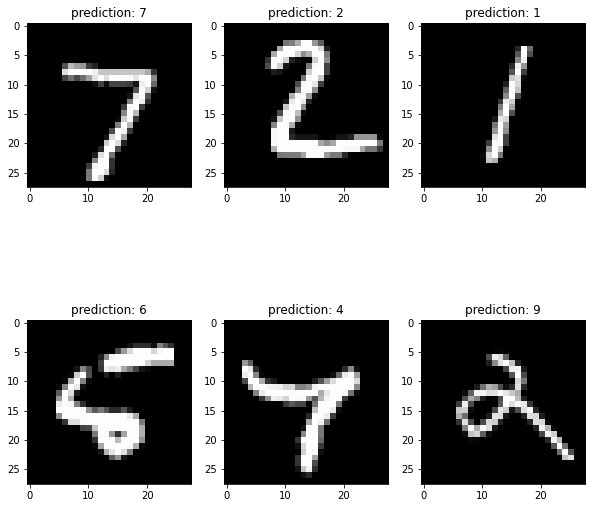

In [8]:
# 샘플 테스트
sample = X_test_f[:3]
sample_pred = svm.predict(sample)

# 오답 샘플 테스트
wrong_sample = X_test_f[wrong[:3]]
wrong_sample_pred = svm.predict(wrong_sample)

# 이미지 및 예측값 출력
plt.figure(figsize=(10, 10))

# 샘플 1
plt.subplot(2, 3, 1)
plt.title(f'prediction: {sample_pred[0]}')
plt.imshow(X_test[0], cmap='gray')

# 샘플 2
plt.subplot(2, 3, 2)
plt.title(f'prediction: {sample_pred[1]}')
plt.imshow(X_test[1], cmap='gray')

# 샘플 3
plt.subplot(2, 3, 3)
plt.title(f'prediction: {sample_pred[2]}')
plt.imshow(X_test[2], cmap='gray')

# 오답 샘플 1
plt.subplot(2, 3, 4)
plt.title(f'prediction: {wrong_sample_pred[0]}')
plt.imshow(X_test[wrong[0]], cmap='gray')

# 오답 샘플 2
plt.subplot(2, 3, 5)
plt.title(f'prediction: {wrong_sample_pred[1]}')
plt.imshow(X_test[wrong[1]], cmap='gray')

# 오답 샘플 3
plt.subplot(2, 3, 6)
plt.title(f'prediction: {wrong_sample_pred[2]}')
plt.imshow(X_test[wrong[2]], cmap='gray')

plt.show()

# 커스텀 데이터셋 구성 - #3

In [9]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import matplotlib.pyplot as plt

In [10]:
class MyDataset(Dataset):
  def __init__(self, images, labels, transform):
    self.images = images.numpy()
    self.labels = labels
    self.transform = transform
  
  def __len__(self,):
    return self.images.shape[0]
  
  def __getitem__(self, index):
    images = self.transform(self.images[index])
    labels = self.labels[index]

    return images, labels

In [11]:
train_data = MyDataset(train_set.data[:50000], train_set.targets[:50000], transform_train)
valid_data = MyDataset(train_set.data[50000:], train_set.targets[50000:], transform_test)

print(len(train_data))
print(len(valid_data))
print(len(test_set))

50000
10000
10000


In [12]:
batch_size = 128
train_loader = DataLoader(train_data, batch_size=batch_size)
valid_loader = DataLoader(valid_data, batch_size=batch_size)
test_loader = DataLoader(test_set, batch_size=batch_size)

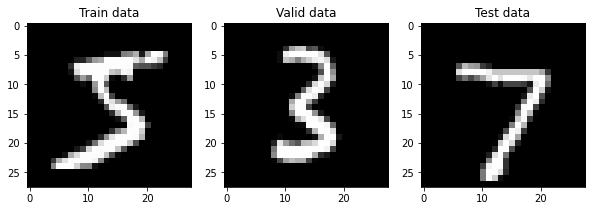

In [13]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1), plt.imshow(train_data.__getitem__(0)[0].squeeze(), 'gray'), plt.title('Train data')
plt.subplot(1, 3, 2), plt.imshow(valid_data[0][0].squeeze(), 'gray'), plt.title('Valid data')
plt.subplot(1, 3, 3), plt.imshow(test_set[0][0].squeeze(), 'gray'), plt.title('Test data')

plt.show()

In [14]:
# gpu를 사용할 수 있으면 gpu, 아니면 cpu 사용
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

# CNN 모델 구성 - #4

In [15]:
# LeNet 모델 정의
class LeNet5(nn.Module):
  # 모델 구조 선언
  def __init__(self, num_classes):
    super().__init__()

    # 컨볼루션 블록
    self.backbone = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(5, 5), stride=(1, 1), padding=0, padding_mode='zeros'), # MNIST
                                  # nn.Conv2d(in_channels=3, out_channels=6, kernel_size=(5, 5), stride=(1, 1), padding=0, padding_mode='zeros'), # Cifar-10
                                  nn.Tanh(),
                                  nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0),
                                  nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5, 5), stride=(1, 1), padding=0, padding_mode='zeros'),
                                  nn.Tanh(),
                                  nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0),
                                  nn.Conv2d(in_channels=16, out_channels=120, kernel_size=(5, 5), stride=(1, 1), padding=0, padding_mode='zeros'),
                                  nn.Tanh())

    # 분류기
    self.classifier = nn.Sequential(nn.Linear(in_features=120, out_features=84),
                                    nn.Tanh(),
                                    nn.Linear(in_features=84, out_features=num_classes))

  # 순전파
  def forward(self, image):
    # 컨볼루션 블록
    feature = self.backbone(image)

    # Flatten
    feature = feature.view(feature.shape[0], -1)

    # 분류기
    pred = self.classifier(feature)

    return pred

In [16]:
# 모델 생성
lenet5 = LeNet5(10).to(device)
lenet5

LeNet5(
  (backbone): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
  )
  (classifier): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [17]:
# 커스텀 모델 정의
class MyModel(nn.Module):
  # 모델 구조 선언
  def __init__(self, num_classes):
    super().__init__()

    # 첫번째 블록
    self.conv1_1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3, 3), stride=(1, 1), padding=0, padding_mode='zeros') # MNIST
    # self.conv1_1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), stride=(1, 1), padding=0, padding_mode='zeros') # Cifar-10
    self.conv1_2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), stride=(1, 1), padding=0, padding_mode='zeros')
    self.pool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)

    # 두번째 블록
    self.conv2_1 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=0, padding_mode='zeros')
    self.conv2_2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding=0, padding_mode='zeros')
    self.pool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)

    # 분류기
    self.classifier = nn.Linear(in_features=1024, out_features=num_classes) # MNIST
    # self.classifier = nn.Linear(in_features=1600, out_features=num_classes) # Cifar-10

  # 순전파
  def forward(self, image):
    # 첫번째 블록
    f1 = nn.ReLU()(self.conv1_1(image))
    f1 = nn.ReLU()(self.conv1_2(f1))
    f1 = self.pool1(f1)

    # 두번째 블록
    f2 = nn.ReLU()(self.conv2_1(f1))
    f2 = nn.ReLU()(self.conv2_2(f2))
    f2 = self.pool2(f2)

    # Flatten
    f2 = f2.view(f2.shape[0], -1)

    # 분류기
    pred = nn.Sigmoid()(self.classifier(f2))

    return pred

In [18]:
# 모델 생성
mymodel = MyModel(num_classes=10).to(device)
mymodel

MyModel(
  (conv1_1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (classifier): Linear(in_features=1024, out_features=10, bias=True)
)

In [19]:
model = mymodel
# model = lenet5

# Optimizer, Loss Function 구성 - #5

In [20]:
# 학습률 설정
learning_rate = 0.1

# SGD
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Momentum
# optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# RMSprop
# optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, alpha=0.99)

# Adam
# optimizer = optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999))

In [21]:
# Cross Entropy Loss
criterion = nn.CrossEntropyLoss().to(device)

In [22]:
# 텐서보드 기록자 생성
writer = SummaryWriter(f'log/mymodel')

# 학습 - #6

In [23]:
# 에폭 설정
Epoch = 10

# 저장 위치 설정
ckpt_path = './checkpoint'
if not os.path.exists(ckpt_path):
  os.makedirs(ckpt_path)

# 최소 loss
best_loss = 9999

# 모델 학습 모드
model.train()

# 에폭만큼 반복
for epoch in range(Epoch):
  print(f'Epoch {epoch}:')
  train_loss = 0
  
  ###### 모델 학습 ######
  print(f'Training model...')
  # dataloader를 통한 데이터 불러오기
  for image, label in tqdm(train_loader):
    # 데이터 연산 위치 지정 (GPU or CPU)
    image = image.to(device)
    label = label.to(device)

    # 모델에 입력 (순전파)
    pred = model(image)
    
    # Loss 계산
    loss = criterion(pred, label)

    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 최종 loss 누적
    train_loss += loss.detach().cpu().numpy()

  # 학습 loss 기록
  train_loss /= len(train_loader)
  writer.add_scalar("train_loss", train_loss, epoch)
  print(f'Train Loss: {train_loss}\n')

  ###### 모델 평가 ######
  print(f'Validating model...')
  accuracy = 0
  valid_loss = 0

  # 모델 평가 모드
  model.eval()

  # gradient 계산 차단
  with torch.no_grad():
    # Dataloader로 데이터 불러오기
    for image, label in tqdm(valid_loader):
      # 데이터 연산 위치 지정 (GPU or CPU)
      image = image.to(device)
      label = label.to(device)

      # 모델에 입력 (순전파)
      pred = model(image)

      # Loss 계산
      loss = criterion(pred, label)
      
      # 최종 loss 누적
      valid_loss += loss.detach().cpu().numpy()

      # 정답 개수 누적
      corr = (pred.argmax(axis=1) == label).sum()
      accuracy += corr.detach().cpu().numpy()

  # 평가 loss 기록
  valid_loss /= len(valid_loader)
  writer.add_scalar("valid_loss", valid_loss, epoch)
  print(f'Valid Loss: {valid_loss}')

  # 정확도 계산
  accuracy /= len(valid_data)
  print(f'Accuracy: {100*accuracy}%\n')

  # 최소 loss가 갱신되면 모델 저장
  if best_loss > valid_loss:
    print('Saving model...\n')
    best_loss = valid_loss
    torch.save(model.state_dict(), os.path.join(ckpt_path, 'model.ckpt'))

Epoch 0:
Training model...


100%|██████████| 391/391 [00:10<00:00, 36.81it/s] 


Train Loss: 1.89322486466459

Validating model...


100%|██████████| 79/79 [00:00<00:00, 197.49it/s]


Valid Loss: 1.5585035357294204
Accuracy: 89.01%

Saving model...

Epoch 1:
Training model...


100%|██████████| 391/391 [00:03<00:00, 117.63it/s]


Train Loss: 1.5374645186812066

Validating model...


100%|██████████| 79/79 [00:00<00:00, 192.88it/s]


Valid Loss: 1.515622599215447
Accuracy: 95.19%

Saving model...

Epoch 2:
Training model...


100%|██████████| 391/391 [00:03<00:00, 108.74it/s]


Train Loss: 1.5108511810717375

Validating model...


100%|██████████| 79/79 [00:00<00:00, 139.33it/s]


Valid Loss: 1.5026157309737387
Accuracy: 96.31%

Saving model...

Epoch 3:
Training model...


100%|██████████| 391/391 [00:03<00:00, 117.33it/s]


Train Loss: 1.5018464961015354

Validating model...


100%|██████████| 79/79 [00:00<00:00, 185.15it/s]


Valid Loss: 1.499074113519886
Accuracy: 96.53%

Saving model...

Epoch 4:
Training model...


100%|██████████| 391/391 [00:03<00:00, 116.96it/s]


Train Loss: 1.4972165652248255

Validating model...


100%|██████████| 79/79 [00:00<00:00, 184.10it/s]


Valid Loss: 1.4929869265495976
Accuracy: 97.03%

Saving model...

Epoch 5:
Training model...


100%|██████████| 391/391 [00:03<00:00, 111.09it/s]


Train Loss: 1.4939631299899363

Validating model...


100%|██████████| 79/79 [00:00<00:00, 137.13it/s]


Valid Loss: 1.4957298809968973
Accuracy: 96.65%

Epoch 6:
Training model...


100%|██████████| 391/391 [00:03<00:00, 112.24it/s]


Train Loss: 1.4910374017017882

Validating model...


100%|██████████| 79/79 [00:00<00:00, 192.99it/s]


Valid Loss: 1.492819140229044
Accuracy: 96.97%

Saving model...

Epoch 7:
Training model...


100%|██████████| 391/391 [00:03<00:00, 116.70it/s]


Train Loss: 1.4885118742428167

Validating model...


100%|██████████| 79/79 [00:00<00:00, 195.31it/s]


Valid Loss: 1.488061530680596
Accuracy: 97.61%

Saving model...

Epoch 8:
Training model...


100%|██████████| 391/391 [00:03<00:00, 113.50it/s]


Train Loss: 1.4865578278861082

Validating model...


100%|██████████| 79/79 [00:00<00:00, 141.35it/s]


Valid Loss: 1.4900285578981232
Accuracy: 97.28%

Epoch 9:
Training model...


100%|██████████| 391/391 [00:03<00:00, 110.80it/s]


Train Loss: 1.4848298181963089

Validating model...


100%|██████████| 79/79 [00:00<00:00, 193.89it/s]

Valid Loss: 1.4886847734451294
Accuracy: 97.42%



In [24]:
%load_ext tensorboard
%tensorboard --logdir log

<IPython.core.display.Javascript object>

# 시험 - #7

In [25]:
# 모델 위치 지정
path = './checkpoint/model.ckpt'

# 모델 가중치 불러오기
model.load_state_dict(torch.load(path))

# 정확도
accuracy = 0

# 모델 평가 모드
model.eval()

# gradient 계산 차단
with torch.no_grad():
  # Dataloader로 데이터 불러오기
  for image, label in test_loader:
    # 데이터 연산 위치 지정 (GPU or CPU)
    image = image.to(device)
    label = label.to(device)

    # 모델에 입력 (순전파)
    pred = model(image)

    # 정답 개수 누적
    corr = (pred.argmax(axis=1) == label).sum()
    accuracy += corr.detach().cpu().numpy()

# 정확도 계산
accuracy /= len(test_set)
print(f'Accuracy: {100*accuracy}%')

Accuracy: 97.69%


# 계층별 Feature 확인 - #8

In [26]:
# 계층별 feature 출력 함수
def visualize_feature(image):
  # 계층별 feature
  f1 = model.conv1_1(image)
  f2 = model.conv1_2(nn.ReLU()(f1))
  f3 = model.pool1(f2)
  f4 = model.conv2_1(f3)
  f5 = model.conv2_2(nn.ReLU()(f4))
  f6 = model.pool1(f5)

  # image 출력
  plt.figure(figsize=(3, 3))
  plt.subplot(1, 1, 1), plt.title('image'), plt.imshow(image.squeeze().detach().cpu().numpy(), cmap='gray')
  plt.show()

  # f1 feature 출력
  print('====== feature 1 ======')
  print(f'f1 shape: {f1.shape}')
  plt.figure(figsize=(20, 3))
  for i in range(32):
      plt.subplot(2, 16, i+1), plt.imshow(f1[i].squeeze().detach().cpu().numpy(), cmap='gray'), plt.xticks([]), plt.yticks([])
  plt.show()

  # f1 feature 출력
  print('====== feature 3 ======')
  print(f'f3 shape: {f3.shape}')
  plt.figure(figsize=(20, 3))
  for i in range(32):
      plt.subplot(2, 16, i+1), plt.imshow(f3[i].squeeze().detach().cpu().numpy(), cmap='gray'), plt.xticks([]), plt.yticks([])
  plt.show()

  # f1 feature 출력
  print('====== feature 6 ======')
  print(f'f6 shape: {f6.shape}')
  plt.figure(figsize=(20, 5))
  for i in range(64):
      plt.subplot(4, 16, i+1), plt.imshow(f6[i].squeeze().detach().cpu().numpy(), cmap='gray'), plt.xticks([]), plt.yticks([])
  plt.show()

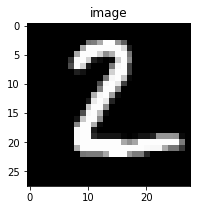

====== feature 1 ======
f1 shape: torch.Size([32, 26, 26])


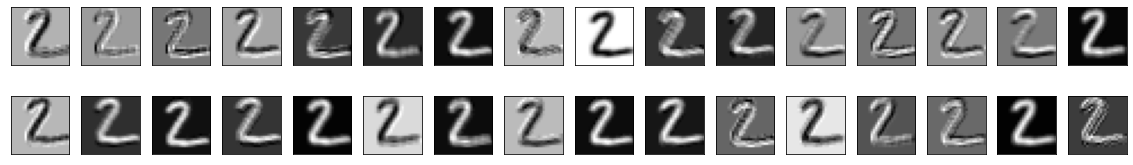

====== feature 3 ======
f3 shape: torch.Size([32, 12, 12])


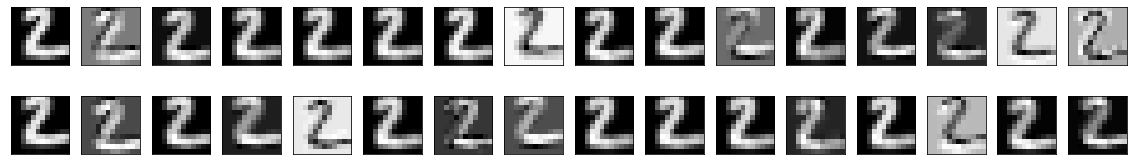

====== feature 6 ======
f6 shape: torch.Size([64, 4, 4])


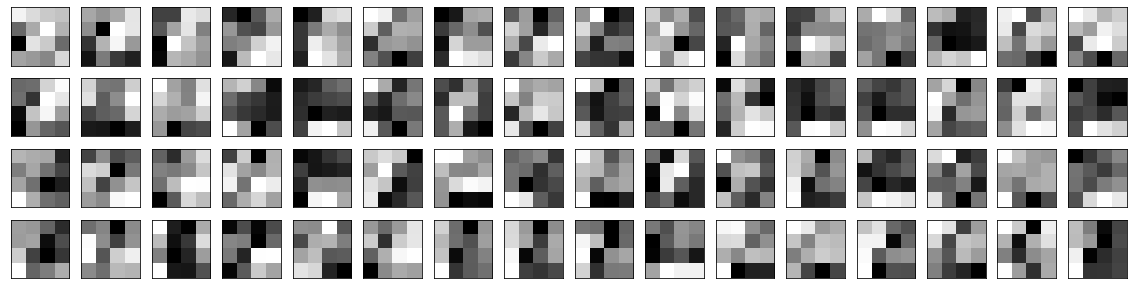

In [27]:
image = test_set.data[1].unsqueeze(0).type(torch.FloatTensor).to(device)
visualize_feature(image)